In [5]:
import os
import numpy as np
import env
import pandas as pd
import acquire_copy as acq
import matplotlib as plt
import seaborn as  sb
# import prepare_functionscl as prep
import scipy.stats as stats
from pydataset import data
from sklearn.model_selection import train_test_split

## Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.


In [6]:
def connect(db):
    
    """This function will pull the information from my env file (username, password, host,
    database) to connect to Codeup's MySQL database"""
    
    return f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db}'

In [7]:
q = '''SELECT measurements.sepal_length,\
    measurements.sepal_width, measurements.petal_length, measurements.petal_width,\
    species.species_name
     FROM measurements JOIN species ON (species.species_id=measurements.species_id)'''

idf = pd.read_sql(q, connect('iris_db'))
idf.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:

def split_iris(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on species.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(idf, test_size=.2, random_state=123, stratify=idf.species_name)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.species_name)
    return train, validate, test

split_iris(idf)


(     sepal_length  sepal_width  petal_length  petal_width species_name
 79            5.7          2.6           3.5          1.0   versicolor
 36            5.5          3.5           1.3          0.2       setosa
 133           6.3          2.8           5.1          1.5    virginica
 95            5.7          3.0           4.2          1.2   versicolor
 18            5.7          3.8           1.7          0.3       setosa
 139           6.9          3.1           5.4          2.1    virginica
 20            5.4          3.4           1.7          0.2       setosa
 31            5.4          3.4           1.5          0.4       setosa
 6             4.6          3.4           1.4          0.3       setosa
 115           6.4          3.2           5.3          2.3    virginica
 91            6.1          3.0           4.6          1.4   versicolor
 145           6.7          3.0           5.2          2.3    virginica
 125           7.2          3.2           6.0          1.8    vi

In [9]:
train_validate, test = train_test_split(idf, test_size=.2, random_state=123, stratify=idf.species_name)
train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.species_name)

In [10]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))



## Univariate Stats

   - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

   - For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

   - Document takeaways & any actions.



In [11]:
train.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species_name     object
dtype: object

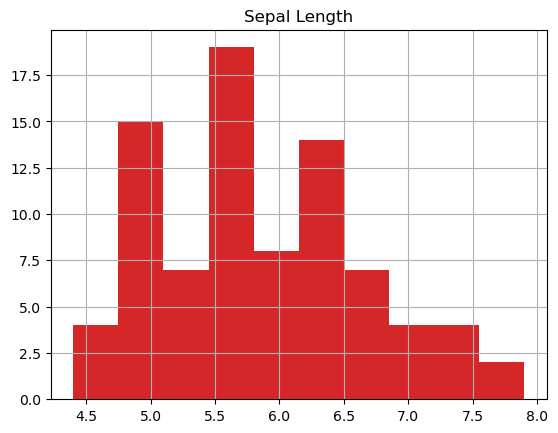

In [12]:
# First, I need to group together all of my non-object columns

numeric_cols =train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in numeric_cols:
    
    a = train['sepal_length'].hist()
    a.set_title('Sepal Length')



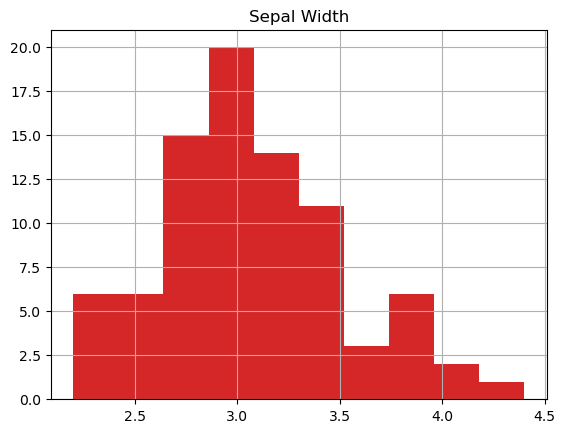

In [81]:

numeric_cols =train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in numeric_cols:
    
    b = train['sepal_width'].hist()
    b.set_title('Sepal Width')




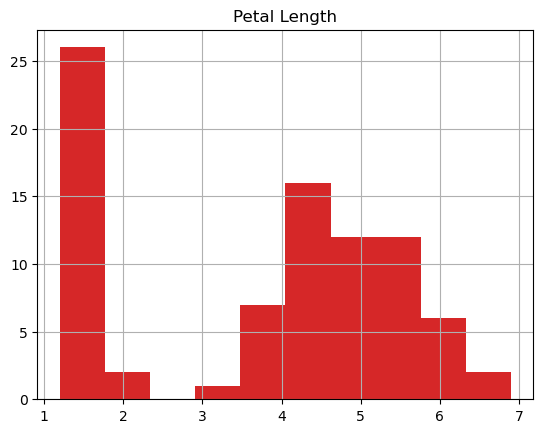

In [13]:

numeric_cols =train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in numeric_cols:
    
    c = train['petal_length'].hist()
    c.set_title('Petal Length')




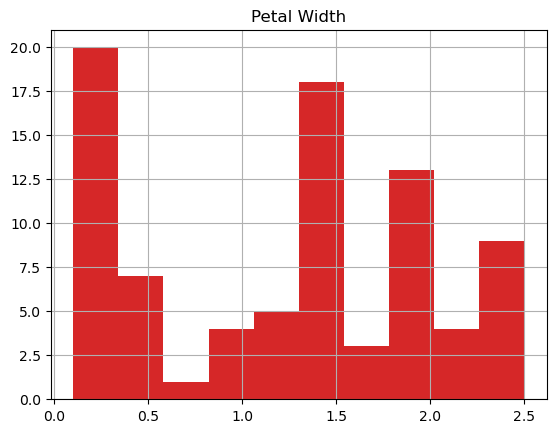

In [14]:

numeric_cols =train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in numeric_cols:
    
    d = train['petal_width'].hist()
    d.set_title('Petal Width')




### Takeaways:
- Sepal width and length are normally distributed



# Bivariate Stats

   1. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

   2. For each measurement type, compute the descriptive statistics for each species.

   3. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

   4. Document takeaways & any actions.



Title: 'Average Sepal Length by species'

<AxesSubplot:xlabel='species_name', ylabel='sepal_length'>

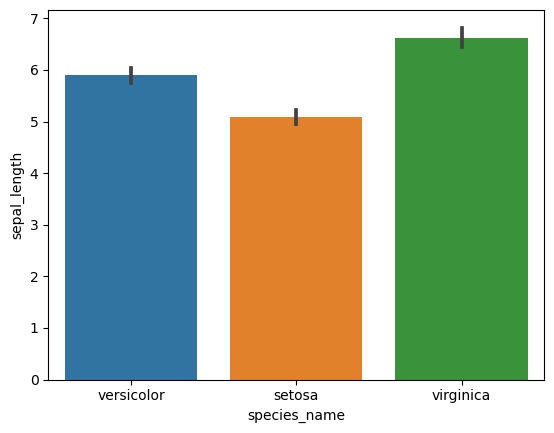

In [15]:
sb.barplot(x= 'species_name', y='sepal_length', data=train)


Title: 'Average Sepal Width by Species'

<AxesSubplot:xlabel='species_name', ylabel='sepal_width'>

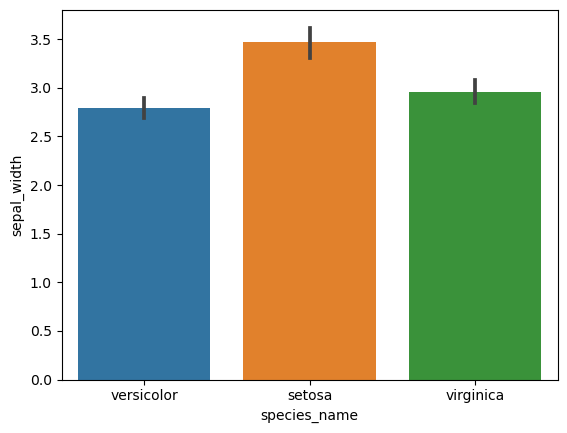

In [16]:
sb.barplot(x= 'species_name', y='sepal_width', data=train)

Title: 'Average Petal Length by Species'

<AxesSubplot:xlabel='species_name', ylabel='petal_length'>

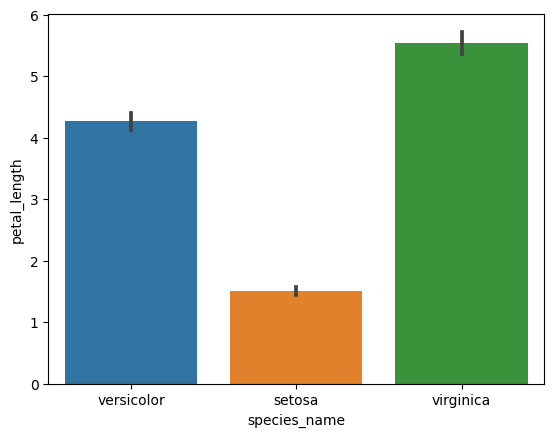

In [17]:
sb.barplot(x= 'species_name', y='petal_length', data=train)

Title: 'Average Petal Width by Species'

<AxesSubplot:xlabel='species_name', ylabel='petal_width'>

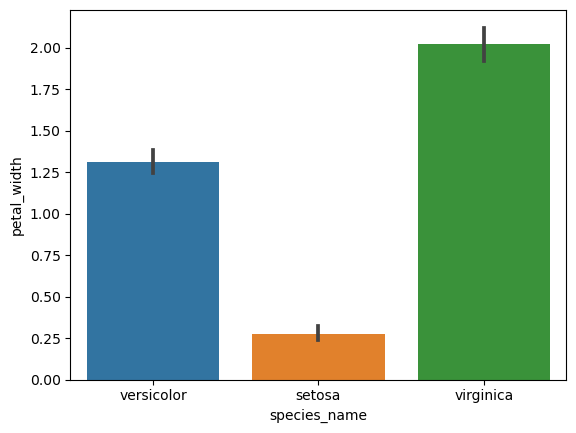

In [18]:
sb.barplot(x= 'species_name', y='petal_width', data=train)

In [102]:
# Virginica
train[train['species_name']== 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [104]:
# Setosa

train[train['species_name']== 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.00000
mean,5.089286,3.467857,1.507143,0.27500
std,0.360390,0.427788,0.184448,0.12057
min,4.400000,2.300000,1.200000,0.10000
25%,4.875000,3.275000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.400000,3.800000,1.600000,0.40000
max,5.800000,4.400000,1.900000,0.60000


In [105]:
# Versicolor
train[train['species_name']== 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286
std,0.425556,0.280848,0.409930,0.199470
min,4.900000,2.300000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.800000,2.800000,4.250000,1.300000
75%,6.125000,3.000000,4.525000,1.500000
max,6.900000,3.400000,5.100000,1.800000


In [19]:
v1 = train[train['species_name']== 'virginica']
v2 = train[train['species_name']== 'versicolor']
a=0.05
null= 'no significant difference in petal width between v1 and v2'
alt = 'significant difference in petal width between v1 and v2'

In [20]:
#Petal width

t, p = stats.mannwhitneyu(v1.petal_width, v2.petal_width)

if p < a:
    print( 'p=', p)
    print("Reject the null hypothesis that", null)
    print("Sufficient evidence to move forward understanding that", alt)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

p= 6.47119166980993e-10
Reject the null hypothesis that no significant difference in petal width between v1 and v2
Sufficient evidence to move forward understanding that significant difference in petal width between v1 and v2


In [21]:
#Petal Length

v1 = train[train['species_name']== 'virginica']
v2 = train[train['species_name']== 'versicolor']
a=0.05
null= 'no significant difference in petal length between v1 and v2'
alt = 'significant difference in petal length between v1 and v2'

t, p = stats.mannwhitneyu(v1.petal_length, v2.petal_length)

if p < a:
    print( 'p=', p)
    print("Reject the null hypothesis that", null)
    print("Sufficient evidence to move forward understanding that", alt)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

p= 2.9479835715150625e-10
Reject the null hypothesis that no significant difference in petal length between v1 and v2
Sufficient evidence to move forward understanding that significant difference in petal length between v1 and v2


In [123]:
#Sepal Length
v1 = train[train['species_name']== 'virginica']
v2 = train[train['species_name']== 'versicolor']
a=0.05
null= 'no significant difference in sepal length between v1 and v2'
alt = 'significant difference in sepal length between v1 and v2'

t, p = stats.mannwhitneyu(v1.sepal_length, v2.sepal_length)

if p < a:
    print( 'p=', p)
    print("Reject the null hypothesis that", null)
    print("Sufficient evidence to move forward understanding that", alt)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

p= 3.082029196534108e-06
Reject the null hypothesis that no significant difference in sepal length between v1 and v2
Sufficient evidence to move forward understanding that significant difference in sepal length between v1 and v2


In [128]:
v1 = train[train['species_name']== 'virginica']
v2 = train[train['species_name']== 'versicolor']
a=0.05
null= 'no significant difference in sepal width between v1 and v2'
alt = 'significant difference in sepal width between v1 and v2'

t, p = stats.mannwhitneyu(v1.sepal_width, v2.sepal_width)

if p < a:
    print( 'p=', p)
    print("Reject the null hypothesis that", null)
    
    print("Sufficient evidence to move forward understanding that", alt)
else:
    print( 'p=', p)
    print("Fail to reject the null that there is", null)
    
    print("Insufficient evidence to reject the null that there is", null)

p= 0.05257259139845694
Fail to reject the null that there is no significant difference in sepal width between v1 and v2
Insufficient evidence to reject the null that there is no significant difference in sepal width between v1 and v2


## Multivariate



Multivariate Stats

   1. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

   2. Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

   3. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

   4. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).




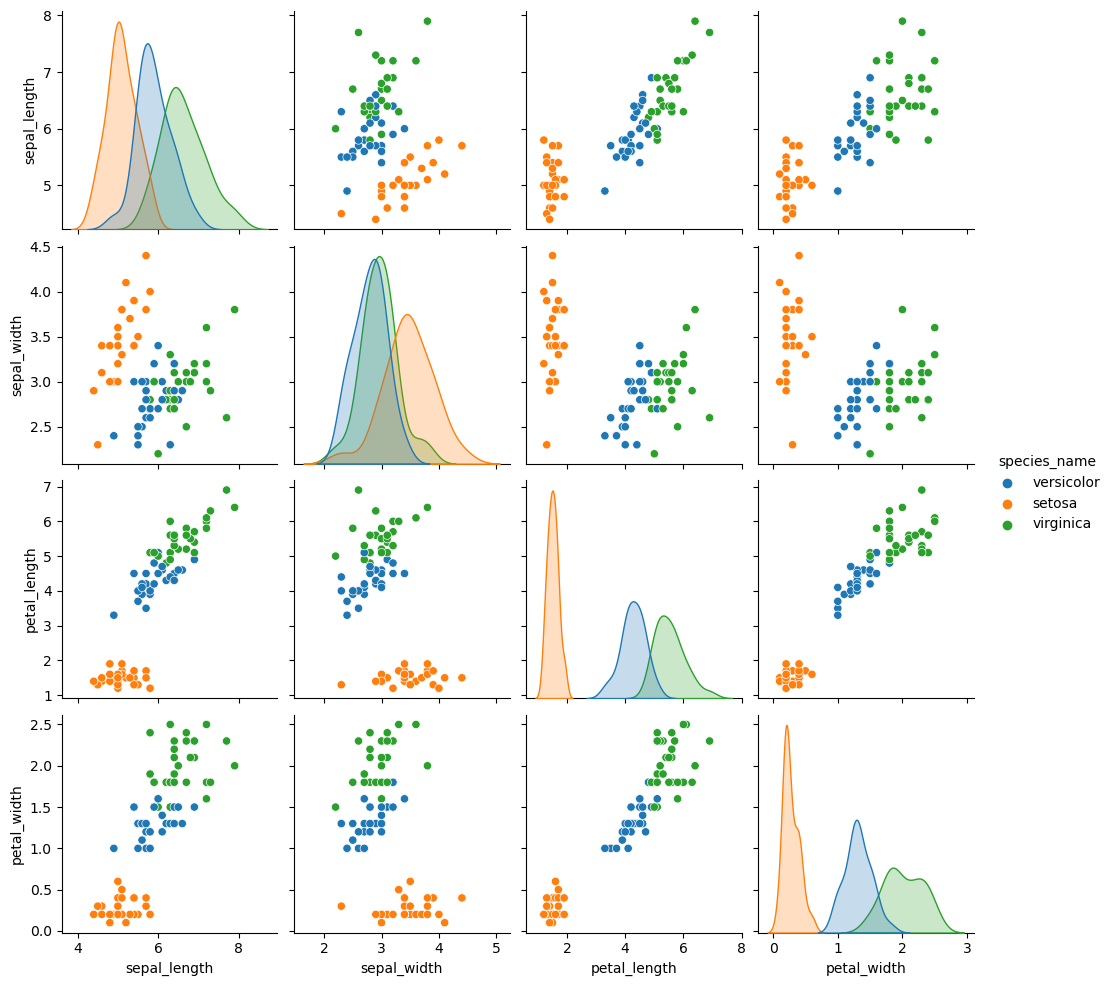

In [22]:
sb.pairplot(data=train, hue='species_name')

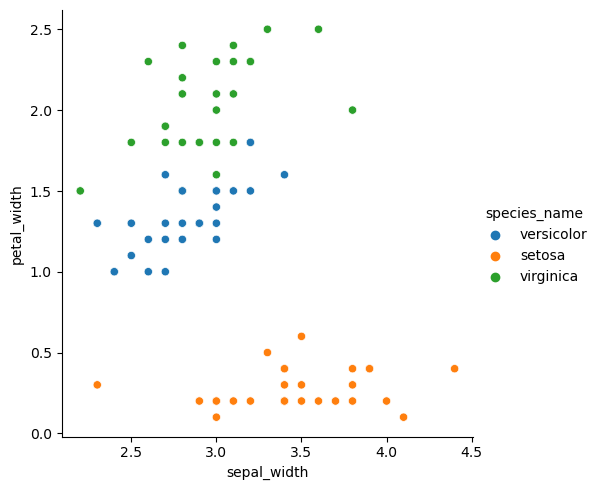

In [131]:
sb.relplot(x='sepal_width', y='petal_width', data=train, hue='species_name')

/Users/mackbookair/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='measures', ylabel='values'>

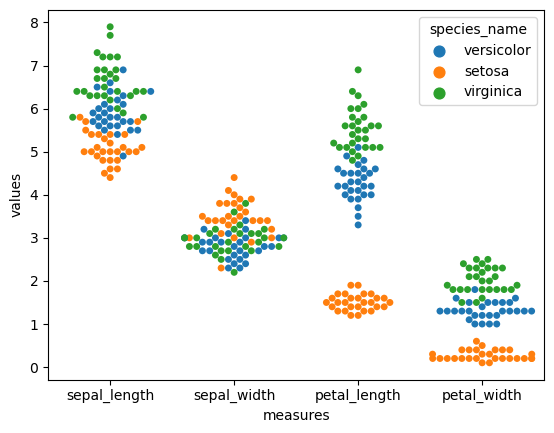

In [26]:

smeltit_dealtit= train.melt(id_vars=['species_name'], value_name= 'values',
                            var_name= 'measures')
sb.swarmplot(data=smeltit_dealtit,x='measures', y= 'values', hue= 'species_name' )

### Takeaways:

1. Setosa consistently has the shortest petal length and width
2. Virginica has the highest petal width and length values
3. Sepal width has the least variance across all metrics

## Part II

Explore your titanic dataset more completely.

   - Determine drivers of the target variable
   - Determine if certain columns should be dropped
   - Determine if it would be valuable to bin some numeric columns
   - Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [98]:
def connect(db):
    
    """This function will pull the information from my env file (username, password, host,
    database) to connect to Codeup's MySQL database"""
    
    return f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db}'

In [99]:
df = acq.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [100]:
def prep_titanic(df):
    """This function preps data in the titanic csv (via the get_titanic_data() function
    in acquire_copy) for future use"""
    df=df.drop(columns=['embarked', 'class', 'age', 'deck'])
    dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True)
    df = pd.concat([titanic, dummy_df], axis = 1)
    
    return titanic


def split_titanic(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on titanic.survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.survived)
    return train, validate, test

In [101]:
df = prep_titanic(df)
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [102]:
# Dropping redundant columns
df = df.drop(columns=['embarked', 'class', 'deck'])
df
    

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


In [103]:
# dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True)
# tdf = pd.concat([titanic, dummy_df], axis = 1)
# tdf

In [104]:

train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.survived)
train, validate, test

(     passenger_id  survived  pclass     sex   age  sibsp  parch      fare  \
 583           583         0       1    male  36.0      0      0   40.1250   
 165           165         1       3    male   9.0      0      2   20.5250   
 50             50         0       3    male   7.0      4      1   39.6875   
 259           259         1       2  female  50.0      0      1   26.0000   
 306           306         1       1  female   NaN      0      0  110.8833   
 ..            ...       ...     ...     ...   ...    ...    ...       ...   
 313           313         0       3    male  28.0      0      0    7.8958   
 636           636         0       3    male  32.0      0      0    7.9250   
 222           222         0       3    male  51.0      0      0    8.0500   
 485           485         0       3  female   NaN      3      1   25.4667   
 744           744         1       3    male  31.0      0      0    7.9250   
 
      embark_town  alone  
 583    Cherbourg      1  
 165  So

In [105]:
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

In [106]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
583,583,0,1,male,36.0,0,0,40.1250,Cherbourg,1
165,165,1,3,male,9.0,0,2,20.5250,Southampton,0
50,50,0,3,male,7.0,4,1,39.6875,Southampton,0
259,259,1,2,female,50.0,0,1,26.0000,Southampton,0
306,306,1,1,female,NaN,0,0,110.8833,Cherbourg,1


In [107]:
train.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embark_town      object
alone             int64
dtype: object

In [93]:
train.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583.0,0.0,1.0,0.0,0.0,40.1250,1.0,1,0,0
165,165.0,1.0,3.0,0.0,2.0,20.5250,0.0,1,0,1
50,50.0,0.0,3.0,4.0,1.0,39.6875,0.0,1,0,1
259,259.0,1.0,2.0,0.0,1.0,26.0000,0.0,0,0,1
306,306.0,1.0,1.0,0.0,0.0,110.8833,1.0,0,0,0


In [108]:
train.sex.value_counts()

male      323
female    175
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='survived'>

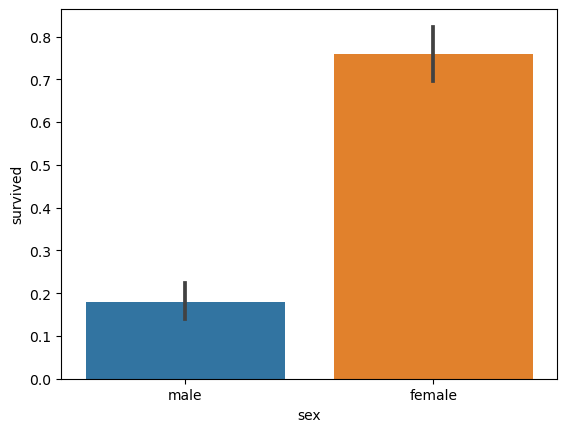

In [113]:
gents = train[train.sex == 'male']
ladies =train[train.sex == 'female']

sb.barplot(x= 'sex', y= 'survived', data= train)

It appears that women had nearly 4 times the survival rating as men

<AxesSubplot:xlabel='pclass', ylabel='survived'>

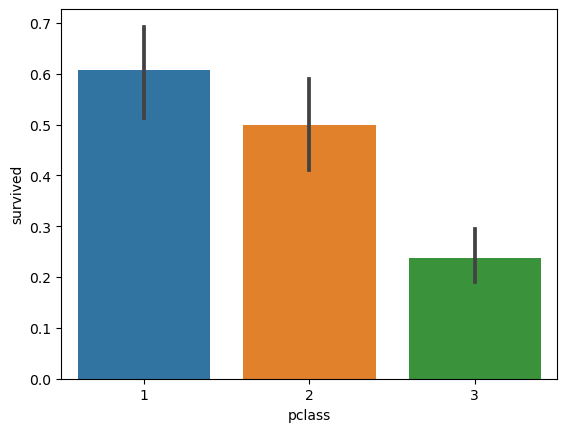

In [115]:
sb.barplot(x= 'pclass', y= 'survived', data= train)

1st & 2nd class guests had a much higher likeliness of survival than 3rd class. The gap between 1st & 2nd isn't as big as I would've expected based on the movie.

<AxesSubplot:xlabel='pclass', ylabel='survived'>

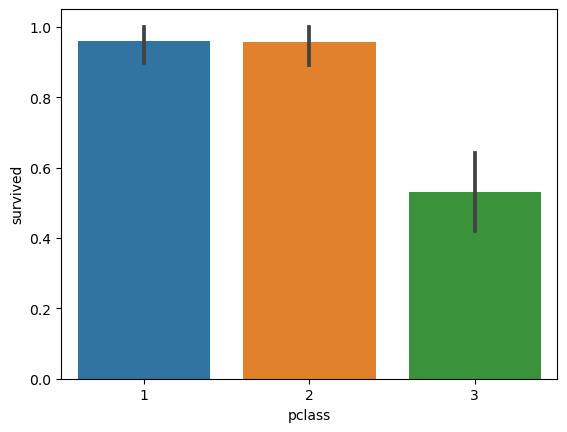

In [118]:
sb.barplot(x= 'pclass', y= 'survived', data= ladies)

1st & 2nd class ladies had almost the same survival rate, which was still higher than 3rd class ladies

<AxesSubplot:xlabel='sex', ylabel='survived'>

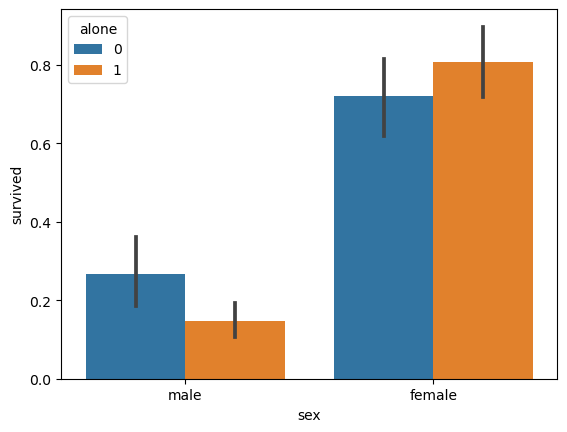

In [120]:
sb.barplot(x= 'sex', y= 'survived', hue='alone', data= train)

AMAB traveling along are much less likely to survive than AFAB traveling alone

### Takeaways:
- Best chance of survival was being AFAB
- Amongst those AFAB, survival was more likely for 1st/2nd class ticket holders than 3rd class
- AFAB folks traveling along are waaay more likely to survive than AMAB folks also traveling alone